In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
model_load = load_model('model/model_224/vgg16-244-rgb.h5')

In [4]:
image_generator = ImageDataGenerator(rescale=1/255)
test_data = 'testing'
test_image_data = image_generator.flow_from_directory(test_data, target_size=(224, 224), batch_size=75)
# test_image_data = image_generator.flow_from_directory(test_data, target_size=(128, 128), batch_size=75)

Found 75 images belonging to 3 classes.


In [ ]:
for image_batch, label_batch in test_image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (75, 224, 224, 3)
Label batch shape:  (75, 3)


In [ ]:
predicted_batch = model_load.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

3/3 [==============================] - 11s 3s/step


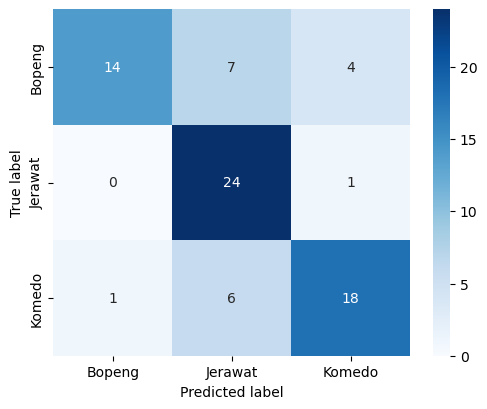

In [ ]:
cf_matrix = confusion_matrix(label_id, predicted_id)
cm_df = pd.DataFrame(
    cf_matrix,
    index=["Bopeng", "Jerawat", "Komedo"],
    columns=["Bopeng", "Jerawat", "Komedo"]
)
figure = plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
faces = ['bopeng', 'jerawat', 'komedo']
classification_metrics = classification_report(label_id, predicted_id, target_names=faces, zero_division=0)
print(classification_metrics)

              precision    recall  f1-score   support

      bopeng       0.93      0.56      0.70        25
     jerawat       0.65      0.96      0.77        25
      komedo       0.78      0.72      0.75        25

    accuracy                           0.75        75
   macro avg       0.79      0.75      0.74        75
weighted avg       0.79      0.75      0.74        75



In [ ]:
# print(predicted_id)
# print(label_id)
# label_batch